In [1]:
import torch

import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import cv2

In [28]:
test =np.load('/l/users/xiangjian.hou/preprocessed/eyepacs/train/15222_left.npy',allow_pickle=True).item()

In [29]:
test['image'].shape

(224, 224, 3)

In [30]:
test['image'].max()

22

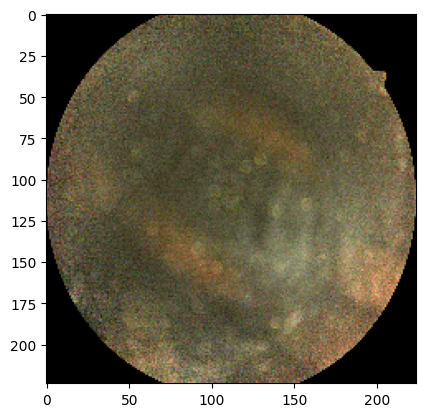

In [35]:
gray = cv2.cvtColor(test['image'], cv2.COLOR_BGR2GRAY)

# Threshold the image to remove the black edges
_, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

# Find the contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the bounding box of the largest contour
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the image to the ROI
cropped = test['image'][y:y+h, x:x+w]
# show the image
resized = cv2.resize(cropped, (224, 224))
plt.imshow(resized / 22)

In [37]:
resized.mean()

6.1484375

# aptos dataset png

In [42]:
from PIL import Image
origin_data = Image.open('/l/users/xiangjian.hou/hc701-fed_data/eyepacs/diabetic-retinopathy-detection/train/15222_left.jpeg')
gray = cv2.cvtColor(np.array(origin_data), cv2.COLOR_BGR2GRAY)
# Threshold the image to remove the black edges
_, thresholded = cv2.threshold(gray, 2, 255, cv2.THRESH_BINARY)
# Find the contours in the thresholded image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Find the bounding box of the largest contour
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)
# Crop the image to the ROI
cropped = np.array(origin_data)[y:y+h, x:x+w]
# show the image
cropped = cropped / cropped.max()
resized = cv2.resize(cropped, (224, 224))

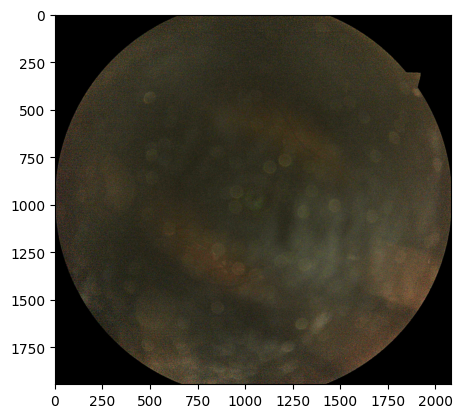

In [44]:
plt.imshow(cropped)